In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2


In [9]:
X=df[['Age','SibSp','Pclass','Fare','SibSp','Sex']]
Y=df[['Survived']]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [10]:
model=DecisionTreeClassifier(max_depth=7)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=7)

In [11]:
pred=model.predict(xtest)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [12]:
model.feature_importances_

array([0.50364462, 0.        , 0.        , 0.198996  , 0.        ,
       0.29735938])

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

[[ 5 11]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.63      0.90      0.75        21

    accuracy                           0.65        37
   macro avg       0.67      0.61      0.59        37
weighted avg       0.67      0.65      0.61        37



[Text(0.4431818181818182, 0.9375, 'x[5] <= 0.5\ngini = 0.421\nsamples = 146\nvalue = [44, 102]'),
 Text(0.18181818181818182, 0.8125, 'x[0] <= 3.0\ngini = 0.131\nsamples = 71\nvalue = [5, 66]'),
 Text(0.3125, 0.875, 'True  '),
 Text(0.13636363636363635, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.22727272727272727, 0.6875, 'x[0] <= 49.5\ngini = 0.083\nsamples = 69\nvalue = [3, 66]'),
 Text(0.09090909090909091, 0.5625, 'x[3] <= 143.025\ngini = 0.034\nsamples = 58\nvalue = [1, 57]'),
 Text(0.045454545454545456, 0.4375, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]'),
 Text(0.13636363636363635, 0.4375, 'x[3] <= 152.506\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.09090909090909091, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.3125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.36363636363636365, 0.5625, 'x[3] <= 51.981\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.3181818181818182, 0.4375, 'x[0] <= 57.5\ngini = 0.

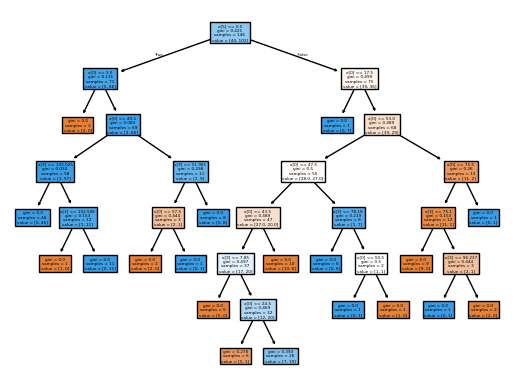

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(model,filled=True)